In [1]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')


In [2]:
# Display some summary information and a few sample documents
print(f"Number of documents: {len(data.data)}\n")
print("Categories:", data.target_names, "\n")

# Display the first 3 documents with their categories, limited to the first 500 characters for readability
for i in range(3):
    print(f"Document {i+1} (Category: {data.target_names[data.target[i]]}):\n")
    print(data.data[i][:500])  # Show the first 500 characters
    print("\n" + "="*80 + "\n")

Number of documents: 18846

Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'] 

Document 1 (Category: rec.sport.hockey):

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killin


Document 2 (Categor

In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re

# Load data
data = fetch_20newsgroups(subset='all')
documents = data.data
labels = data.target

# Preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to all documents
nltk.download('stopwords')
documents = [preprocess(doc) for doc in documents]

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for simplicity
X = vectorizer.fit_transform(documents)
y = labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Experimenting with different kernels

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel is commonly used for text classification

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Model Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Model Accuracy: 0.8774535809018568
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       151
           1       0.70      0.81      0.75       202
           2       0.83      0.82      0.82       195
           3       0.67      0.73      0.70       183
           4       0.89      0.83      0.86       205
           5       0.83      0.82      0.82       215
           6       0.86      0.80      0.83       193
           7       0.89      0.90      0.90       196
           8       0.96      0.92      0.94       168
           9       0.95      0.96      0.96       211
          10       0.97      0.97      0.97       198
          11       0.98      0.93      0.95       201
          12       0.81      0.82      0.81       202
          13       0.90      0.92      0.91       194
          14       0.94      0.97      0.95       189
          15       0.91      0.96      0.93       202
          16  

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', degree=2)  # degree can be adjusted as needed

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions (optional, if you want to evaluate the model)
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8883289124668435
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.69      0.87      0.77       202
           2       0.89      0.83      0.86       195
           3       0.73      0.74      0.73       183
           4       0.88      0.84      0.86       205
           5       0.87      0.83      0.85       215
           6       0.89      0.80      0.84       193
           7       0.92      0.93      0.92       196
           8       0.96      0.94      0.95       168
           9       0.97      0.96      0.96       211
          10       0.98      0.96      0.97       198
          11       0.99      0.93      0.96       201
          12       0.73      0.88      0.80       202
          13       0.90      0.92      0.91       194
          14       0.95      0.96      0.96       189
          15       0.89      0.94      0.92       202
          16       0.95     

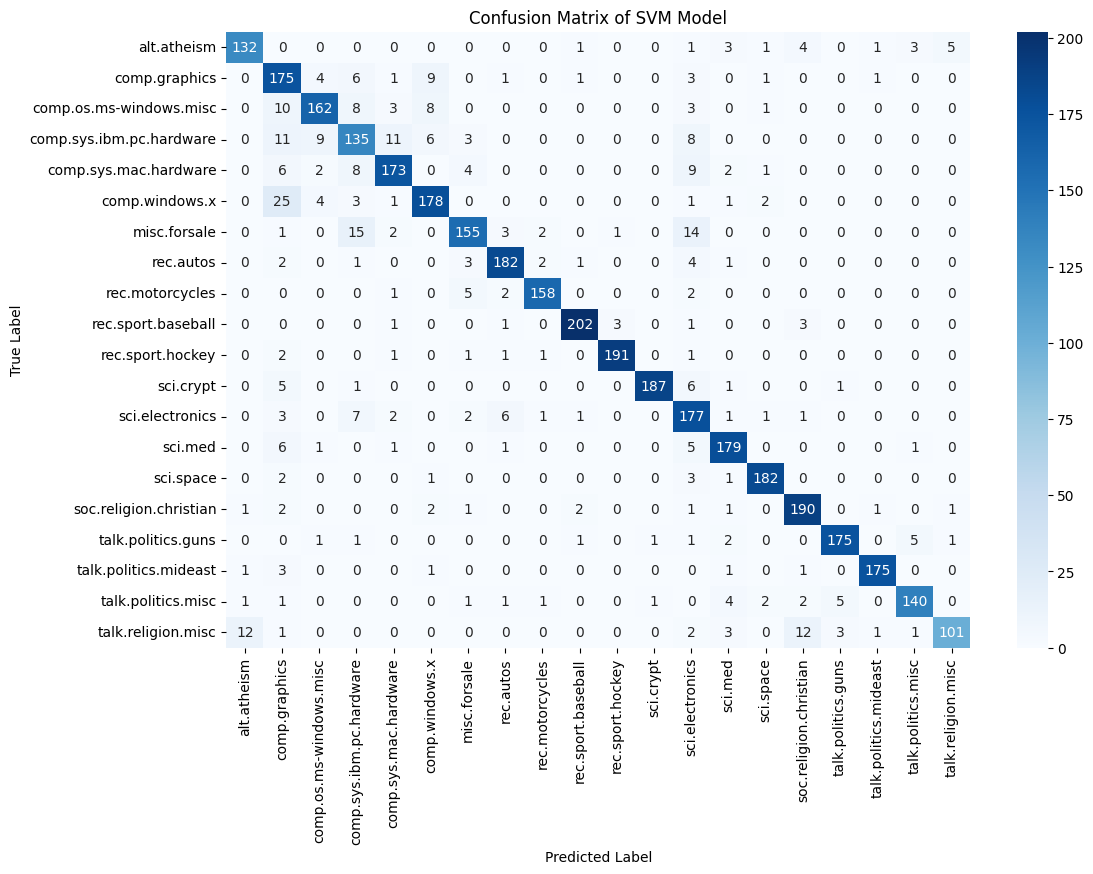

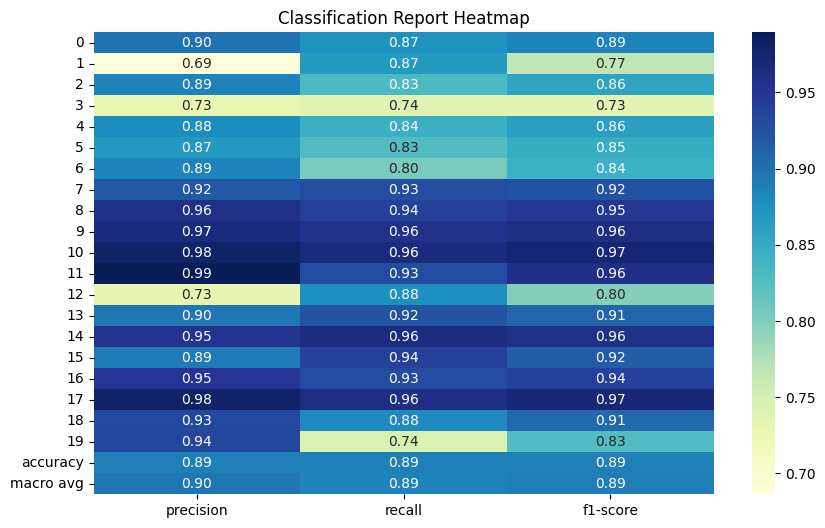

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVM Model')
plt.show()

# Display the classification report as a heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a polynomial kernel
svm_model = SVC(kernel='sigmoid', degree=2)  # degree can be adjusted as needed

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions (optional, if you want to evaluate the model)
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8679045092838197
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       151
           1       0.69      0.79      0.74       202
           2       0.81      0.81      0.81       195
           3       0.64      0.72      0.68       183
           4       0.88      0.82      0.85       205
           5       0.82      0.81      0.82       215
           6       0.86      0.77      0.81       193
           7       0.86      0.89      0.87       196
           8       0.96      0.92      0.94       168
           9       0.92      0.96      0.94       211
          10       0.97      0.96      0.96       198
          11       0.98      0.93      0.95       201
          12       0.80      0.80      0.80       202
          13       0.90      0.91      0.91       194
          14       0.94      0.96      0.95       189
          15       0.90      0.95      0.92       202
          16       0.92     

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Define a function to recommend similar documents based on a new input text
def recommend_from_input(input_text, vectorizer, X, documents, labels, category_names, top_n=5):
    # Vectorize the input text
    input_vector = vectorizer.transform([input_text])

    # Calculate cosine similarity between the input text and all documents
    cosine_sim = cosine_similarity(input_vector, X).flatten()

    # Get top N most similar documents (excluding the input itself)
    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommended_indices = [i[0] for i in sim_scores]

    # Display the recommendations
    print(f"Recommendations for the input text: Looking for information about latest sports news \n")
    for idx in recommended_indices:
        category = category_names[labels[idx]]
        snippet = documents[idx][:200]  # Show a snippet of each recommended document
        print(f"Recommended Document (Category: {category}):")
        print(f"{snippet}")
        print("-" * 80)  # Separator for clarity


input_text = "Looking for information about sports news"  # User input
recommend_from_input(input_text, vectorizer, X, documents, labels, category_names)


Recommendations for the input text: Looking for information about latest sports news 

Recommended Document (Category: rec.sport.baseball):
phillyraveludeledu robert c hite subject wfan nntppostinghost raveludeledu organization university delaware lines article aprvirginiaedu jjahvirginiaedu writes one listen wfan know talking sports radi
--------------------------------------------------------------------------------
Recommended Document (Category: rec.sport.baseball):
sepinwalmailsasupennedu alan sepinwall subject wfan organization university pennsylvania school arts sciences lines nntppostinghost mailsasupennedu article cjczkndnewsudeledu phillyraveludeledu robert
--------------------------------------------------------------------------------
Recommended Document (Category: rec.autos):
ckauxacsouiucedu carolinafanuiuc subject bang articleid newscndgf distribution na organization university illinois urbana lines jmhhoppervirginiaedu jeffrey hoffmeister writes article aprprogresscom 

Adding Lemmatization

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
data = fetch_20newsgroups(subset='all')
documents = data.data
labels = data.target

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function with lemmatization and unknown word handling
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords and apply lemmatization
    processed_words = []
    for word in words:
        if word not in stop_words:
            # Lemmatize the word
            lemma = lemmatizer.lemmatize(word)
            # Check if the lemma exists in WordNet (to filter unknown words)
            if wordnet.synsets(lemma):
                processed_words.append(lemma)
    return ' '.join(processed_words)

# Apply preprocessing to all documents
documents = [preprocess(doc) for doc in documents]

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for simplicity
X = vectorizer.fit_transform(documents)
y = labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', degree=2)  # degree can be adjusted as needed

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions (optional, if you want to evaluate the model)
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8793103448275862
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       151
           1       0.74      0.84      0.78       202
           2       0.84      0.82      0.83       195
           3       0.68      0.75      0.71       183
           4       0.85      0.80      0.83       205
           5       0.80      0.82      0.81       215
           6       0.85      0.78      0.81       193
           7       0.92      0.92      0.92       196
           8       0.96      0.93      0.94       168
           9       0.96      0.97      0.96       211
          10       0.98      0.93      0.95       198
          11       0.98      0.92      0.95       201
          12       0.76      0.87      0.81       202
          13       0.91      0.95      0.93       194
          14       0.95      0.96      0.95       189
          15       0.90      0.96      0.93       202
          16       0.92     